# Optimizing Server Configurations for Better Business Performance

## Objective

We aim to identify the best server configurations to improve key business metrics like customer satisfaction, service uptime, and operational costs.

## Setup Environment
To get started, we need to install the necessary Python libraries. Run the following command to install the required packages.

In [320]:
# Setup Environment
%pip install numpy pandas matplotlib seaborn scikit-learn statsmodels


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Overview

Our dataset includes various server configurations and their corresponding performance and business metrics. The key columns include:
- **Business Metrics:**
  - Response Time (ms)
  - Customer Satisfaction (CSAT)
  - Operational Costs ($)
  - Service Uptime (%)
- **Server Metrics:**
  - CPU Utilization (%)
  - Memory Utilization (%)
  - Network I/O Throughput (Mbps)
  - Disk I/O Throughput (MB/s)

In [321]:
# Step 1: Load and Explore Data
import pandas as pd
import numpy as np
import logging

# Load datasets
server_metrics = pd.read_csv("server_metrics.csv")
business_metrics = pd.read_csv("business_metrics.csv")

# Display basic information and statistics
print("Server Metrics Info:")
print(server_metrics.info())
print(server_metrics.describe())
display(server_metrics.head())

print("Business Metrics Info:")
print(business_metrics.info())
print(business_metrics.describe())
display(business_metrics.head())

Server Metrics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      3000 non-null   object 
 1   CPU Utilization (%)            3000 non-null   float64
 2   Memory Utilization (%)         3000 non-null   float64
 3   Network I/O Throughput (Mbps)  3000 non-null   float64
 4   Disk I/O Throughput (MB/s)     3000 non-null   float64
 5   Server Configuration           3000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 140.8+ KB
None
       CPU Utilization (%)  Memory Utilization (%)  \
count          3000.000000             3000.000000   
mean             27.438206               41.001839   
std              33.387453               15.813472   
min               0.001396               10.063554   
25%               2.216836               28.265768   
50%       

,Timestamp,CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration
0,2024-06-14 23:20:01,0.078775,25.426308,2.704048,0.524617,EC2 apache Servers (t2.medium)
1,2024-06-14 23:21:01,0.861617,59.539320,2.168765,3.182316,EC2 WebServers apache (t2.micro)
2,2024-06-14 23:22:01,0.700161,17.639788,4.450947,1.859211,EC2 apache Servers (t2.medium)
3,2024-06-14 23:23:01,2.522884,10.646227,2.507947,0.336144,EC2 apache Servers (t2.medium)
4,2024-06-14 23:24:01,4.446279,35.230470,12.272563,7.121298,EC2 app pet (t2.small)


Business Metrics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     3000 non-null   object 
 1   Server Configuration          3000 non-null   object 
 2   Response Time (ms)            3000 non-null   float64
 3   Customer Satisfaction (CSAT)  3000 non-null   float64
 4   Operational Costs ($)         3000 non-null   float64
 5   Service Uptime (%)            3000 non-null   float64
dtypes: float64(4), object(2)
memory usage: 140.8+ KB
None
       Response Time (ms)  Customer Satisfaction (CSAT)  \
count         3000.000000                   3000.000000   
mean            99.487576                     90.051242   
std             79.798322                      7.979832   
min              8.731373                     70.515992   
25%             36.557260                    

,Timestamp,Server Configuration,Response Time (ms),Customer Satisfaction (CSAT),Operational Costs ($),Service Uptime (%)
0,2024-06-14 23:20:01,EC2 apache Servers (t2.medium),17.976010,98.202399,148.507624,99.882024
1,2024-06-14 23:21:01,EC2 WebServers apache (t2.micro),41.110673,95.888933,210.267772,99.858889
2,2024-06-14 23:22:01,EC2 apache Servers (t2.medium),20.615060,97.938494,148.649690,99.879385
3,2024-06-14 23:23:01,EC2 apache Servers (t2.medium),14.803091,98.519691,129.883526,99.885197
4,2024-06-14 23:24:01,EC2 app pet (t2.small),59.159234,94.084077,227.041144,99.840841


## Data Preprocessing

Data preparation is crucial to ensure reliable analysis.

In [322]:
# Handle missing values
business_metrics.fillna(method="ffill", inplace=True)
server_metrics.fillna(method="ffill", inplace=True)

# Convert timestamp to datetime
business_metrics["Timestamp"] = pd.to_datetime(business_metrics["Timestamp"])
server_metrics["Timestamp"] = pd.to_datetime(server_metrics["Timestamp"])

# Drop the timestamp column if not needed
business_metrics.drop(columns=["Timestamp"], inplace=True)
server_metrics.drop(columns=["Timestamp"], inplace=True)

# Display the data to ensure missing values are handled and timestamp is removed
print("Business Metrics after handling missing values and timestamp:")
display(business_metrics.head())

print("\nServer Metrics after handling missing values and timestamp:")
display(server_metrics.head())

Business Metrics after handling missing values and timestamp:


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_34311/157406655.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  business_metrics.fillna(method="ffill", inplace=True)
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_34311/157406655.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  server_metrics.fillna(method="ffill", inplace=True)


,Server Configuration,Response Time (ms),Customer Satisfaction (CSAT),Operational Costs ($),Service Uptime (%)
0,EC2 apache Servers (t2.medium),17.976010,98.202399,148.507624,99.882024
1,EC2 WebServers apache (t2.micro),41.110673,95.888933,210.267772,99.858889
2,EC2 apache Servers (t2.medium),20.615060,97.938494,148.649690,99.879385
3,EC2 apache Servers (t2.medium),14.803091,98.519691,129.883526,99.885197
4,EC2 app pet (t2.small),59.159234,94.084077,227.041144,99.840841



Server Metrics after handling missing values and timestamp:


,CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration
0,0.078775,25.426308,2.704048,0.524617,EC2 apache Servers (t2.medium)
1,0.861617,59.539320,2.168765,3.182316,EC2 WebServers apache (t2.micro)
2,0.700161,17.639788,4.450947,1.859211,EC2 apache Servers (t2.medium)
3,2.522884,10.646227,2.507947,0.336144,EC2 apache Servers (t2.medium)
4,4.446279,35.230470,12.272563,7.121298,EC2 app pet (t2.small)


In [323]:
# Combine the datasets before encoding
combined_data = pd.concat([business_metrics, server_metrics], axis=1)

# Display the combined data
print("Combined Data:")
display(combined_data.head())

Combined Data:


,Server Configuration,Response Time (ms),Customer Satisfaction (CSAT),Operational Costs ($),Service Uptime (%),CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration
0,EC2 apache Servers (t2.medium),17.976010,98.202399,148.507624,99.882024,0.078775,25.426308,2.704048,0.524617,EC2 apache Servers (t2.medium)
1,EC2 WebServers apache (t2.micro),41.110673,95.888933,210.267772,99.858889,0.861617,59.539320,2.168765,3.182316,EC2 WebServers apache (t2.micro)
2,EC2 apache Servers (t2.medium),20.615060,97.938494,148.649690,99.879385,0.700161,17.639788,4.450947,1.859211,EC2 apache Servers (t2.medium)
3,EC2 apache Servers (t2.medium),14.803091,98.519691,129.883526,99.885197,2.522884,10.646227,2.507947,0.336144,EC2 apache Servers (t2.medium)
4,EC2 app pet (t2.small),59.159234,94.084077,227.041144,99.840841,4.446279,35.230470,12.272563,7.121298,EC2 app pet (t2.small)


In [324]:
# Ensure server configurations are encoded only once
combined_data = pd.concat(
    [business_metrics, server_metrics.drop(columns="Server Configuration")], axis=1
)

# Encode categorical variables in the combined dataset
combined_data_encoded = pd.get_dummies(
    combined_data, columns=["Server Configuration"], drop_first=True
)

# Display the encoded data
print("Combined Data after encoding:")
display(combined_data_encoded.head())

Combined Data after encoding:


,Response Time (ms),Customer Satisfaction (CSAT),Operational Costs ($),Service Uptime (%),CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration_EC2 apache Servers (t2.medium),Server Configuration_EC2 app pet (t2.small),Server Configuration_EC2 app web (t2.small)
0,17.976010,98.202399,148.507624,99.882024,0.078775,25.426308,2.704048,0.524617,True,False,False
1,41.110673,95.888933,210.267772,99.858889,0.861617,59.539320,2.168765,3.182316,False,False,False
2,20.615060,97.938494,148.649690,99.879385,0.700161,17.639788,4.450947,1.859211,True,False,False
3,14.803091,98.519691,129.883526,99.885197,2.522884,10.646227,2.507947,0.336144,True,False,False
4,59.159234,94.084077,227.041144,99.840841,4.446279,35.230470,12.272563,7.121298,False,True,False


In [325]:
# Encode categorical variables in the combined dataset
combined_data_encoded = pd.get_dummies(combined_data, drop_first=True)

# Display the encoded data
print("Combined Data after encoding:")
display(combined_data_encoded.head())

Combined Data after encoding:


,Response Time (ms),Customer Satisfaction (CSAT),Operational Costs ($),Service Uptime (%),CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration_EC2 apache Servers (t2.medium),Server Configuration_EC2 app pet (t2.small),Server Configuration_EC2 app web (t2.small)
0,17.976010,98.202399,148.507624,99.882024,0.078775,25.426308,2.704048,0.524617,True,False,False
1,41.110673,95.888933,210.267772,99.858889,0.861617,59.539320,2.168765,3.182316,False,False,False
2,20.615060,97.938494,148.649690,99.879385,0.700161,17.639788,4.450947,1.859211,True,False,False
3,14.803091,98.519691,129.883526,99.885197,2.522884,10.646227,2.507947,0.336144,True,False,False
4,59.159234,94.084077,227.041144,99.840841,4.446279,35.230470,12.272563,7.121298,False,True,False


In [326]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize numerical features in the combined dataset
combined_data_scaled = pd.DataFrame(
    scaler.fit_transform(combined_data_encoded), columns=combined_data_encoded.columns
)

# Display the normalized data
print("Combined Data after normalization:")
display(combined_data_scaled.head())

Combined Data after normalization:


,Response Time (ms),Customer Satisfaction (CSAT),Operational Costs ($),Service Uptime (%),CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration_EC2 apache Servers (t2.medium),Server Configuration_EC2 app pet (t2.small),Server Configuration_EC2 app web (t2.small)
0,-1.021640,1.021640,-1.176336,1.021640,-0.819589,-0.985117,-0.840623,-1.164642,1.802579,-0.587615,-0.577863
1,-0.731677,0.731677,-0.550534,0.731677,-0.796138,1.172454,-0.907567,-0.470837,-0.554761,-0.587615,-0.577863
2,-0.988563,0.988563,-1.174896,0.988563,-0.800975,-1.477597,-0.622150,-0.816240,1.802579,-0.587615,-0.577863
3,-1.061408,1.061408,-1.365050,1.061408,-0.746372,-1.919925,-0.865148,-1.213843,1.802579,-0.587615,-0.577863
4,-0.505463,0.505463,-0.380572,0.505463,-0.688755,-0.365026,0.356049,0.557453,-0.554761,1.701794,-0.577863


In [327]:
# List the server configurations after combining and encoding the data
server_configurations = [
    col for col in combined_data_encoded.columns if "Server Configuration" in col
]
server_configurations

['Server Configuration_EC2 apache Servers (t2.medium)',
 'Server Configuration_EC2 app pet (t2.small)',
 'Server Configuration_EC2 app web (t2.small)']

## Exploratory Data Analysis (EDA)

Identifying patterns helps us understand what factors influence business metrics.

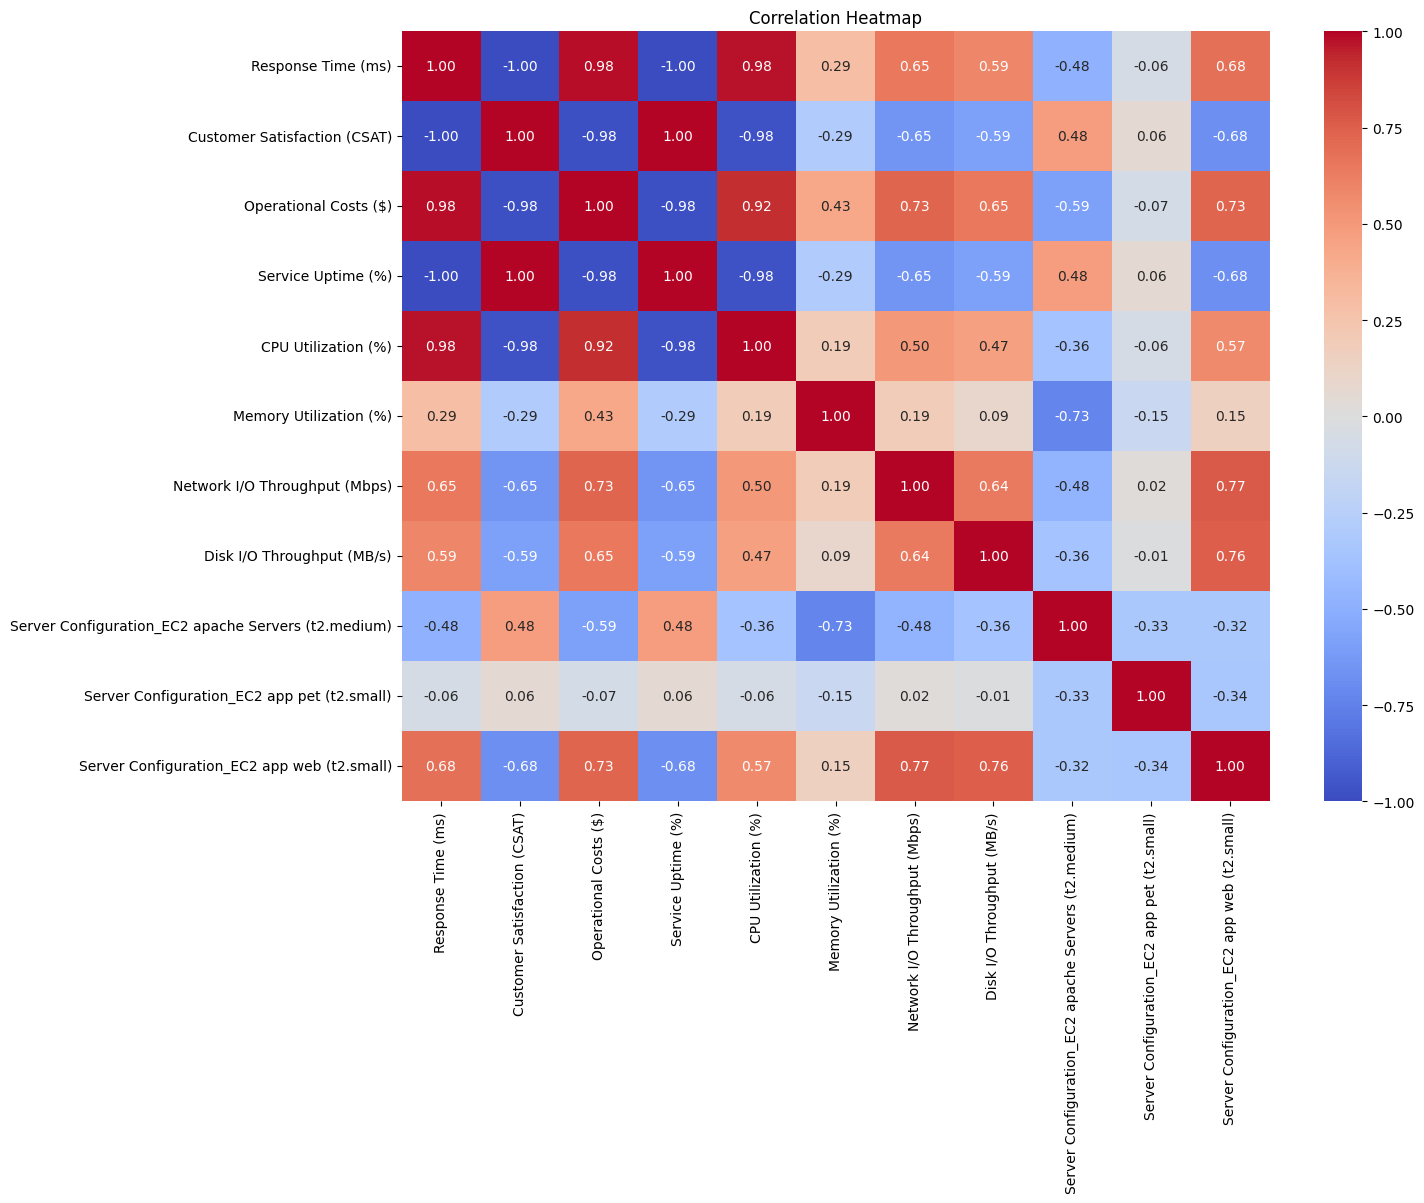

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(combined_data_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

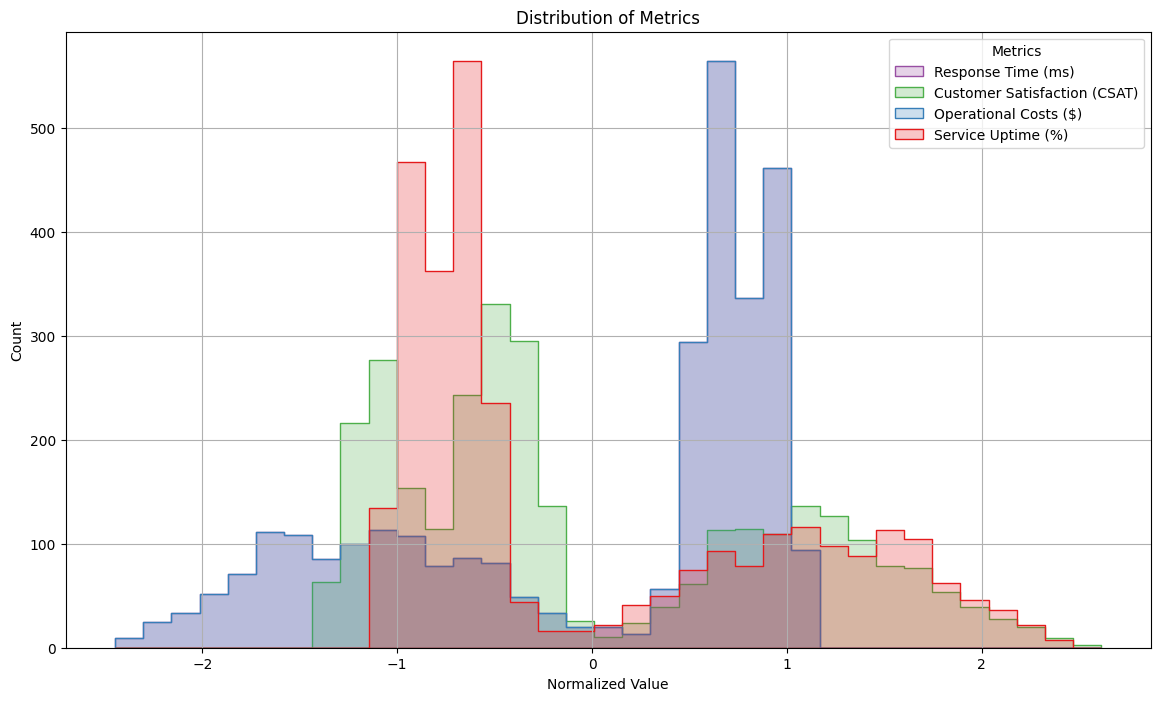

In [329]:
# Select only the required columns
selected_features = business_metrics[
    [
        "Response Time (ms)",
        "Customer Satisfaction (CSAT)",
        "Operational Costs ($)",
        "Service Uptime (%)",
    ]
]

selected_features_scaled = pd.DataFrame(
    scaler.fit_transform(selected_features), columns=selected_features.columns
)

# Melt the data to long format for easier plotting
selected_features_melted = pd.melt(
    selected_features_scaled, var_name="Metric", value_name="Normalized Value"
)

# Create a bar chart with all four metrics
plt.figure(figsize=(14, 8))

sns.histplot(
    data=selected_features_melted,
    x="Normalized Value",
    hue="Metric",
    element="step",
    stat="count",
    common_norm=False,
    palette="Set1",  # Use a distinct color palette
)

plt.title("Distribution of Metrics")
plt.xlabel("Normalized Value")
plt.ylabel("Count")
plt.grid(True)

# Adjust legend placement
plt.legend(
    title="Metrics", loc="upper right", labels=selected_features.columns.tolist()
)

plt.show()

## Feature Engineering and Selection

Feature engineering and selection are crucial steps in the data preprocessing pipeline. They involve creating new features from existing data and selecting the most relevant features to improve the performance of machine learning models. This step can uncover hidden patterns and relationships within the data, leading to more accurate predictions and better insights. We will:
1. Create new features.
2. Add polynomial features.
3. Use Principal Component Analysis (PCA) for dimensionality reduction.


In [330]:
# Create new features from existing data

# Interaction terms
server_metrics["CPU_Memory_Interaction"] = (
    server_metrics["CPU Utilization (%)"] * server_metrics["Memory Utilization (%)"]
)
server_metrics["CPU_Network_Interaction"] = (
    server_metrics["CPU Utilization (%)"]
    * server_metrics["Network I/O Throughput (Mbps)"]
)
server_metrics["Memory_Network_Interaction"] = (
    server_metrics["Memory Utilization (%)"]
    * server_metrics["Network I/O Throughput (Mbps)"]
)

# Ratios
server_metrics["CPU_to_Memory_Ratio"] = server_metrics["CPU Utilization (%)"] / (
    server_metrics["Memory Utilization (%)"] + 1e-9
)
server_metrics["Network_to_Disk_Ratio"] = server_metrics[
    "Network I/O Throughput (Mbps)"
] / (server_metrics["Disk I/O Throughput (MB/s)"] + 1e-9)

# Aggregations
server_metrics["Total_Utilization"] = (
    server_metrics["CPU Utilization (%)"] + server_metrics["Memory Utilization (%)"]
)

# Display the updated data with the new features
print("Updated Server Metrics with New Features:")
display(server_metrics.head())

Updated Server Metrics with New Features:


,CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),Server Configuration,CPU_Memory_Interaction,CPU_Network_Interaction,Memory_Network_Interaction,CPU_to_Memory_Ratio,Network_to_Disk_Ratio,Total_Utilization
0,0.078775,25.426308,2.704048,0.524617,EC2 apache Servers (t2.medium),2.002956,0.213011,68.753952,0.003098,5.154325,25.505083
1,0.861617,59.539320,2.168765,3.182316,EC2 WebServers apache (t2.micro),51.300080,1.868645,129.126803,0.014471,0.681505,60.400937
2,0.700161,17.639788,4.450947,1.859211,EC2 apache Servers (t2.medium),12.350700,3.116382,78.513759,0.039692,2.393998,18.339950
3,2.522884,10.646227,2.507947,0.336144,EC2 apache Servers (t2.medium),26.859196,6.327260,26.700175,0.236974,7.460930,13.169111
4,4.446279,35.230470,12.272563,7.121298,EC2 app pet (t2.small),156.644504,54.567239,432.368151,0.126206,1.723360,39.676749


### Polynomial Features

Polynomial features are generated by taking the existing features and combining them in a non-linear manner up to a specified degree. This allows the model to capture non-linear relationships between features that linear models might miss. By adding polynomial features, we can improve the model's ability to fit complex patterns in the data. For example, if we have two features, \( x_1 \) and \( x_2 \), polynomial features of degree 2 will include terms like \( x_1^2 \), \( x_2^2 \), and \( x_1 \cdot x_2 \).

In [331]:
from sklearn.preprocessing import PolynomialFeatures

# Define the features and target variable
features = server_metrics[
    [
        "CPU Utilization (%)",
        "Memory Utilization (%)",
        "Network I/O Throughput (Mbps)",
        "Disk I/O Throughput (MB/s)",
        "CPU_Memory_Interaction",
        "CPU_Network_Interaction",
        "Memory_Network_Interaction",
        "CPU_to_Memory_Ratio",
        "Network_to_Disk_Ratio",
        "Total_Utilization",
    ]
]
target = business_metrics["Customer Satisfaction (CSAT)"]

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features)
feature_names = poly.get_feature_names_out(features.columns)

# Display the updated data with polynomial features
print("Features with Polynomial Features Added:")
display(
    pd.DataFrame(
        features_poly, columns=poly.get_feature_names_out(features.columns)
    ).head()
)

Features with Polynomial Features Added:


,CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),CPU_Memory_Interaction,CPU_Network_Interaction,Memory_Network_Interaction,CPU_to_Memory_Ratio,Network_to_Disk_Ratio,Total_Utilization,...,Memory_Network_Interaction^2,Memory_Network_Interaction CPU_to_Memory_Ratio,Memory_Network_Interaction Network_to_Disk_Ratio,Memory_Network_Interaction Total_Utilization,CPU_to_Memory_Ratio^2,CPU_to_Memory_Ratio Network_to_Disk_Ratio,CPU_to_Memory_Ratio Total_Utilization,Network_to_Disk_Ratio^2,Network_to_Disk_Ratio Total_Utilization,Total_Utilization^2
0,0.078775,25.426308,2.704048,0.524617,2.002956,0.213011,68.753952,0.003098,5.154325,25.505083,...,4727.105940,0.213011,354.380240,1753.575261,0.000010,0.015969,0.079019,26.567070,131.461497,650.509262
1,0.861617,59.539320,2.168765,3.182316,51.300080,1.868645,129.126803,0.014471,0.681505,60.400937,...,16673.731299,1.868645,88.000603,7799.379844,0.000209,0.009862,0.874086,0.464449,41.163559,3648.273134
2,0.700161,17.639788,4.450947,1.859211,12.350700,3.116382,78.513759,0.039692,2.393998,18.339950,...,6164.410391,3.116382,187.961747,1439.938389,0.001575,0.095023,0.727952,5.731224,43.905794,336.353752
3,2.522884,10.646227,2.507947,0.336144,26.859196,6.327260,26.700175,0.236974,7.460930,13.169111,...,712.899363,6.327260,199.208148,351.617567,0.056157,1.768050,3.120743,55.665481,98.253818,173.425479
4,4.446279,35.230470,12.272563,7.121298,156.644504,54.567239,432.368151,0.126206,1.723360,39.676749,...,186942.218034,54.567239,745.126118,17154.962683,0.015928,0.217498,5.007424,2.969971,68.377335,1574.244426


### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the data into a new coordinate system. The new coordinates, called principal components, are ordered such that the first few retain most of the variation present in the original dataset. PCA is useful for reducing the number of features while preserving the important information, which can improve model performance and reduce overfitting. Each principal component is a linear combination of the original features, and the components are orthogonal to each other, meaning they are uncorrelated.

In [332]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
features_pca = pca.fit_transform(features_poly)
pca_feature_names = [f"PC{i+1}" for i in range(features_pca.shape[1])]

# Display the explained variance ratio to understand the importance of each component
print("Explained Variance Ratio of PCA Components:")
print(pca.explained_variance_ratio_)

# Display the updated data with PCA components
print("Features after PCA:")
display(pd.DataFrame(features_pca, columns=pca_feature_names).head())

Explained Variance Ratio of PCA Components:
[9.27499547e-01 6.59973090e-02 4.61756603e-03 1.35127253e-03
 2.15866943e-04 1.75775121e-04 6.93047343e-05 4.01078322e-05
 2.61638322e-05 2.63952935e-06]
Features after PCA:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.378263e+06,-330496.160047,-143684.601599,-46629.673891,-51978.958094,-9972.035076,-38.110006,16243.269240,-21300.105481,-1668.029621
1,-4.374302e+06,-326567.070355,-132772.844785,-43548.424740,-45942.438691,-9441.412678,359.519610,11776.241877,-18048.870022,-899.166998
2,-4.377934e+06,-329896.709503,-142366.657440,-46228.446032,-51397.953594,-9952.451591,13.918962,16068.126814,-21176.752494,-1941.533468
3,-4.377550e+06,-330977.675412,-145525.426945,-48260.894428,-55301.497249,-10107.892891,58.518782,16863.711055,-20958.161301,-2018.838777
4,-4.336131e+06,-268299.655066,-2158.197039,12343.571003,46574.383079,-1718.142953,1779.537136,-7309.815183,-18830.271137,-2224.718979


## Modeling

The modeling process involves training machine learning models on the preprocessed data to make predictions or classify data points. This step is crucial for extracting valuable insights and achieving the objectives of the analysis. Here, we will:
1. Split the data into training and testing sets.
2. Train different machine learning models.
3. Evaluate the performance of the models using appropriate metrics.


In [333]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_pca, target, test_size=0.2, random_state=42
)

print("Training and testing sets created.")

Training and testing sets created.


In [334]:
# Define the models and hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
}

param_grid = {
    "RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "SVR": {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    "LinearRegression": {},
}

# Perform Grid Search with Cross-Validation
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

print("Models trained and hyperparameters tuned successfully.")

# Identify important features for the RandomForest model
importances = best_models["RandomForest"].feature_importances_
feature_names = pca_feature_names

# Check lengths of feature names and importances
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")

Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 50}
Best parameters for SVR: {'C': 10, 'gamma': 'scale'}
Best parameters for LinearRegression: {}
Models trained and hyperparameters tuned successfully.
Number of feature names: 10
Number of importances: 10


In [335]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Evaluate models
for name, model in best_models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    print(f"\n{name} Cross-Validation R^2 Scores: {cv_scores}")
    print(f"{name} Average Cross-Validation R^2 Score: {cv_scores.mean()}")

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the evaluation metrics
    print(f"\n{name} Model Performance on Test Set:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


RandomForest Cross-Validation R^2 Scores: [0.99613448 0.99559595 0.99592355 0.99585819 0.99423867]
RandomForest Average Cross-Validation R^2 Score: 0.9955501673082484

RandomForest Model Performance on Test Set:
Mean Absolute Error: 0.3473365410719024
Mean Squared Error: 0.24064936065583187
R^2 Score: 0.996101881302584

SVR Cross-Validation R^2 Scores: [0.98308104 0.98071434 0.97916309 0.98062105 0.9808049 ]
SVR Average Cross-Validation R^2 Score: 0.9808768854177817

SVR Model Performance on Test Set:
Mean Absolute Error: 0.8434119407167066
Mean Squared Error: 1.1435792629507893
R^2 Score: 0.9814759212543225

LinearRegression Cross-Validation R^2 Scores: [0.97345549 0.96983783 0.97174938 0.96707404 0.9378142 ]
LinearRegression Average Cross-Validation R^2 Score: 0.963986188240743

LinearRegression Model Performance on Test Set:
Mean Absolute Error: 1.0093691906969966
Mean Squared Error: 1.7560541643400696
R^2 Score: 0.97155484829449


Model Evaluation Metrics:


,Model,Mean Absolute Error,Mean Squared Error,R^2 Score,Cross-Validation R^2 Score
0,RandomForest,0.347337,0.240649,0.996102,0.995550
1,SVR,0.843412,1.143579,0.981476,0.980877
2,LinearRegression,1.009369,1.756054,0.971555,0.963986



Best Model: RandomForest
Mean Absolute Error: 0.3473365410719024
Mean Squared Error: 0.24064936065583187
R^2 Score: 0.996101881302584
Cross-Validation R^2 Score: 0.9955501673082484


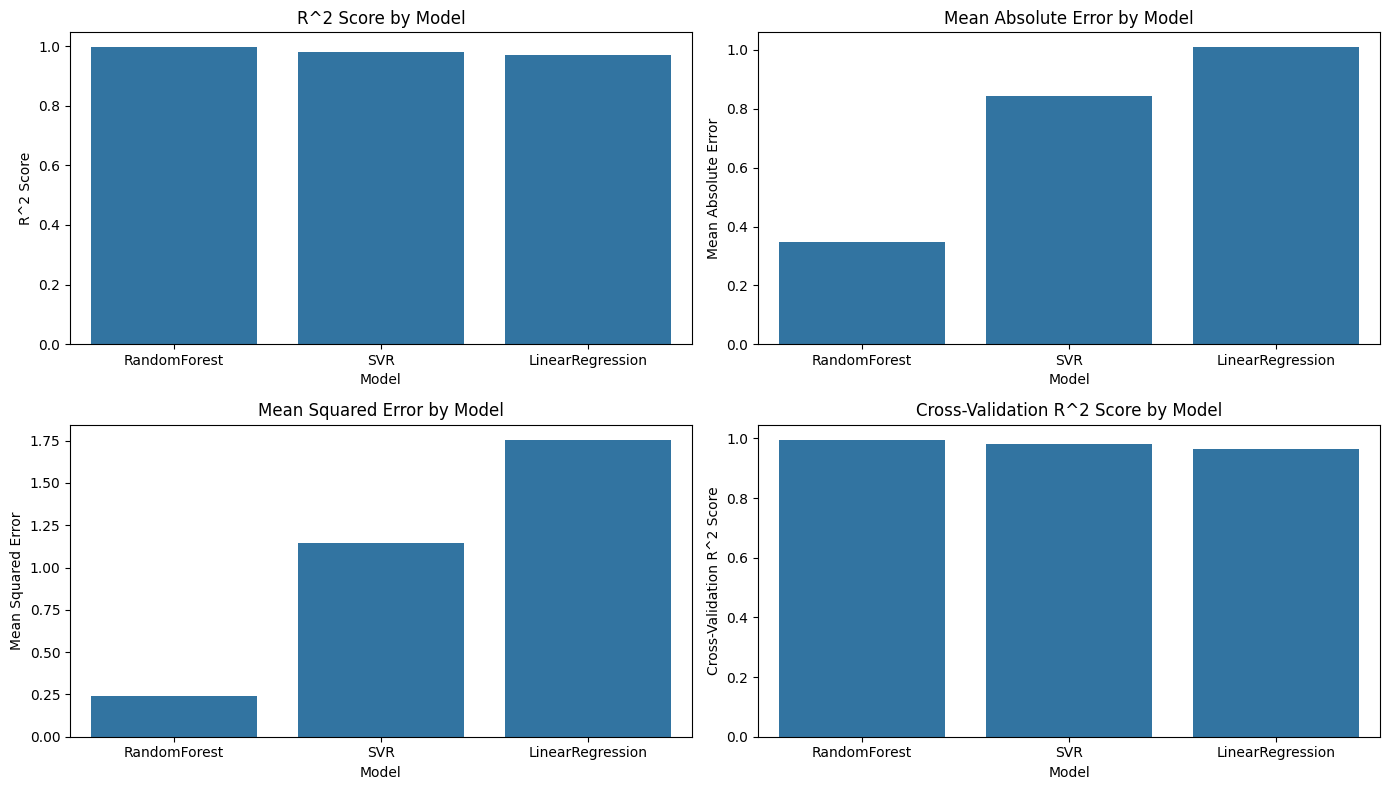

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store evaluation metrics
evaluation_metrics = {
    "Model": [],
    "Mean Absolute Error": [],
    "Mean Squared Error": [],
    "R^2 Score": [],
    "Cross-Validation R^2 Score": [],
}

# Populate the evaluation metrics dictionary
for name, model in best_models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the dictionary
    evaluation_metrics["Model"].append(name)
    evaluation_metrics["Mean Absolute Error"].append(mae)
    evaluation_metrics["Mean Squared Error"].append(mse)
    evaluation_metrics["R^2 Score"].append(r2)
    evaluation_metrics["Cross-Validation R^2 Score"].append(cv_scores.mean())

# Create a DataFrame from the evaluation metrics dictionary
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the evaluation DataFrame
print("Model Evaluation Metrics:")
display(evaluation_df)

# Identify the best model based on the highest R^2 Score
best_model = evaluation_df.loc[evaluation_df["R^2 Score"].idxmax()]

print(f"\nBest Model: {best_model['Model']}")
print(f"Mean Absolute Error: {best_model['Mean Absolute Error']}")
print(f"Mean Squared Error: {best_model['Mean Squared Error']}")
print(f"R^2 Score: {best_model['R^2 Score']}")
print(f"Cross-Validation R^2 Score: {best_model['Cross-Validation R^2 Score']}")

# Plot the evaluation metrics
plt.figure(figsize=(14, 8))

# Bar plot for R^2 Score
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="R^2 Score", data=evaluation_df)
plt.title("R^2 Score by Model")
plt.ylabel("R^2 Score")

# Bar plot for Mean Absolute Error
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Mean Absolute Error", data=evaluation_df)
plt.title("Mean Absolute Error by Model")
plt.ylabel("Mean Absolute Error")

# Bar plot for Mean Squared Error
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Mean Squared Error", data=evaluation_df)
plt.title("Mean Squared Error by Model")
plt.ylabel("Mean Squared Error")

# Bar plot for Cross-Validation R^2 Score
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Cross-Validation R^2 Score", data=evaluation_df)
plt.title("Cross-Validation R^2 Score by Model")
plt.ylabel("Cross-Validation R^2 Score")

plt.tight_layout()
plt.show()

## Model Interpretation

Understanding the results of our machine learning models is crucial for gaining insights and making informed decisions. In this step, we will:
1. Identify the most important features that influence the target variable.
2. Analyze the model predictions to understand their accuracy and reliability.

Number of feature names: 10
Number of importances: 10
Top 10 Most Important Features:


,Feature,Importance
0,PC1,0.937837
1,PC2,0.007382
2,PC3,0.013061
3,PC4,0.000920
4,PC5,0.003984
5,PC6,0.000881
6,PC7,0.015370
7,PC8,0.005146
8,PC9,0.011948
9,PC10,0.003471


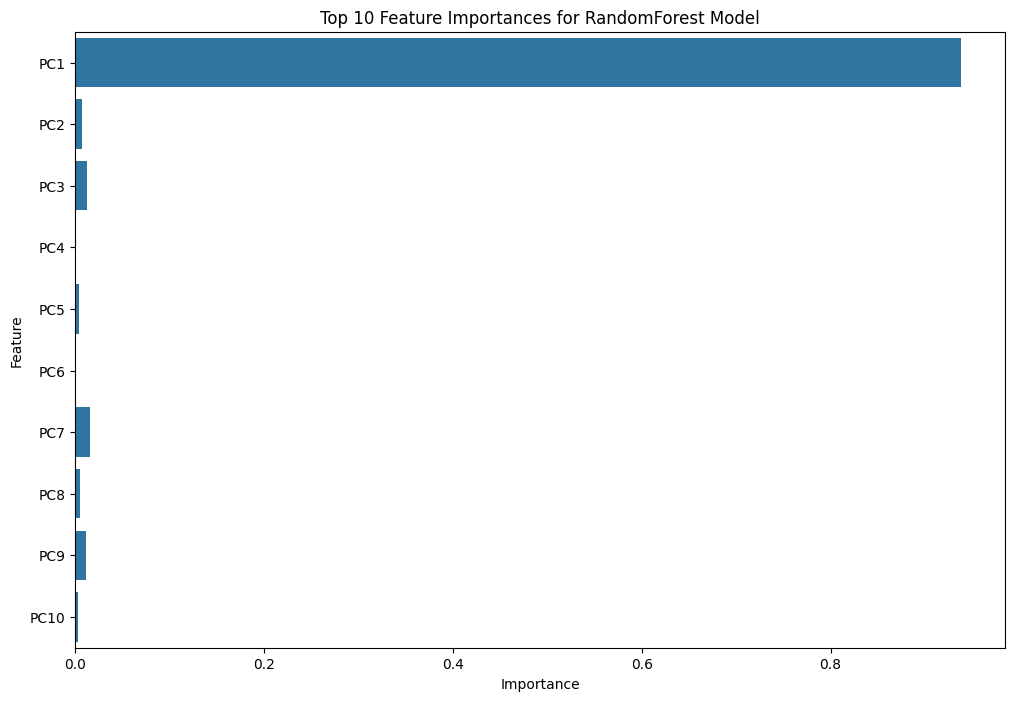

In [337]:
# Identify important features for the RandomForest model
importances = best_models["RandomForest"].feature_importances_
feature_names = pca_feature_names

# Check lengths of feature names and importances
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")

# Create a DataFrame for feature importances
if len(feature_names) == len(importances):
    feature_importances = pd.DataFrame(
        {"Feature": feature_names, "Importance": importances}
    )

    # Display the top 10 most important features
    print("Top 10 Most Important Features:")
    display(feature_importances.head(10))

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
    plt.title("Top 10 Feature Importances for RandomForest Model")
    plt.show()
else:
    print(
        "The lengths of feature names and importances do not match. Please check the feature engineering process."
    )

Comparison of Actual vs Predicted Values:


,Actual,Predicted
1801,95.319500,95.525920
1190,94.137567,93.744913
1817,95.192250,95.163838
251,94.074988,94.001572
2505,98.537562,98.240732
1117,73.284447,74.502491
1411,86.223574,87.004175
2113,71.986306,72.818489
408,91.432543,91.109476
2579,94.906684,94.697320


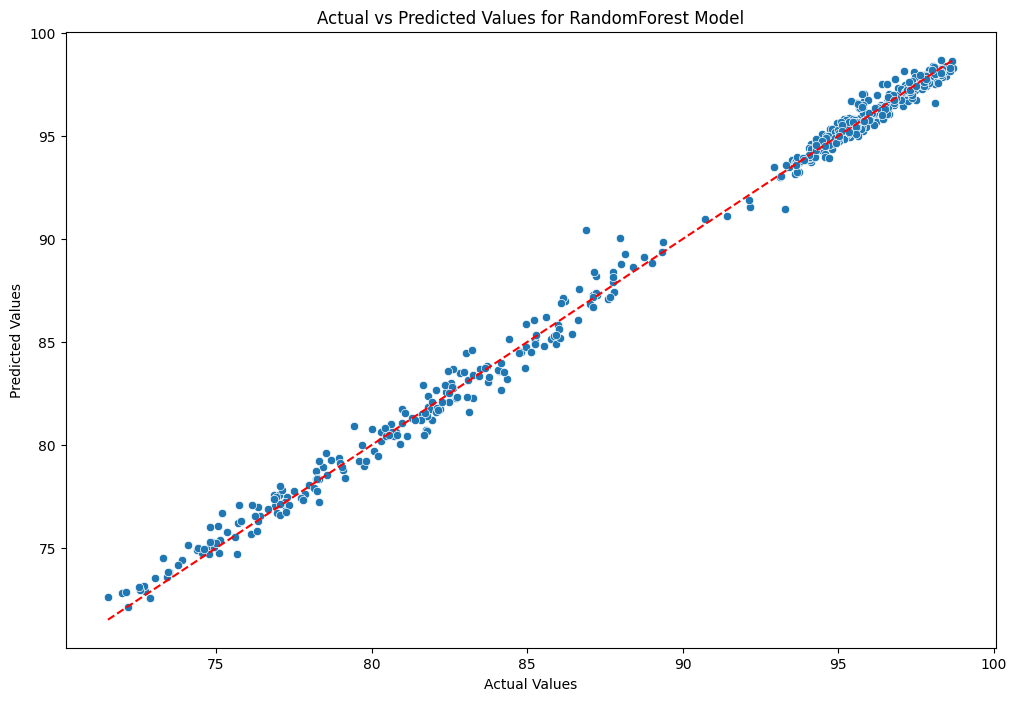

In [338]:
# Compare actual vs predicted values for the best model (RandomForest)
y_pred_best = best_models["RandomForest"].predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_best})

# Display the first 10 rows of the comparison
print("Comparison of Actual vs Predicted Values:")
display(comparison_df.head(10))

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Actual", y="Predicted", data=comparison_df)
plt.plot(
    [comparison_df.min().min(), comparison_df.max().max()],
    [comparison_df.min().min(), comparison_df.max().max()],
    color="red",
    linestyle="--",
)
plt.title("Actual vs Predicted Values for RandomForest Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Optimization Recommendations

Based on the analysis and model insights, the following recommendations are proposed to optimize server configurations and improve key business metrics:

1. **Optimize CPU and Memory Utilization:**
   - The interaction between CPU and memory utilization significantly impacts performance. Ensure balanced allocation of CPU and memory resources to avoid bottlenecks.
   - Consider scaling CPU or memory resources based on usage patterns to maintain optimal performance and reduce operational costs.

2. **Enhance Network Throughput:**
   - Network I/O throughput plays a crucial role in maintaining high service uptime. Monitor and upgrade network infrastructure to handle higher data volumes efficiently.
   - Implement traffic management strategies to prioritize critical data flows, ensuring consistent network performance.

3. **Improve Disk I/O Throughput:**
   - Disk I/O throughput is vital for reducing response times and improving customer satisfaction. Invest in faster storage solutions like SSDs to enhance disk performance.
   - Regularly defragment and optimize storage systems to maintain peak performance.

4. **Monitor and Adjust Resource Ratios:**
   - Maintain an optimal CPU to memory ratio and network to disk ratio. Regularly analyze these ratios and adjust configurations to prevent resource imbalances.
   - Use automated tools to monitor these ratios and trigger alerts or adjustments when thresholds are crossed.

5. **Leverage Predictive Analytics:**
   - Use predictive models to forecast resource demands and preemptively adjust server configurations. This proactive approach can prevent performance degradation and improve service reliability.
   - Continuously update and refine predictive models with new data to enhance their accuracy and effectiveness.

6. **Automate Resource Management:**
   - Implement automation tools for dynamic resource allocation based on real-time usage patterns. This ensures efficient resource utilization and minimizes manual intervention.
   - Utilize cloud-based solutions that offer auto-scaling features to automatically adjust resources based on demand.

By implementing these recommendations, organizations can optimize their server configurations, leading to improved performance, enhanced customer satisfaction, and reduced operational costs.

Top features impacting Customer Satisfaction:


,Feature,Importance
0,PC1,0.937837
1,PC2,0.007382
2,PC3,0.013061
3,PC4,0.000920
4,PC5,0.003984
5,PC6,0.000881
6,PC7,0.015370
7,PC8,0.005146
8,PC9,0.011948
9,PC10,0.003471


Top Contributing Features (Consolidated):
- CPU Utilization (%) Network_to_Disk_Ratio
- Network_to_Disk_Ratio Total_Utilization
- CPU Utilization (%)^2
- Memory Utilization (%) CPU_Memory_Interaction
- CPU_Memory_Interaction CPU_Network_Interaction
- Disk I/O Throughput (MB/s) CPU_Memory_Interaction
- CPU_Network_Interaction Network_to_Disk_Ratio
- CPU_Memory_Interaction CPU_to_Memory_Ratio
- Memory Utilization (%) Network_to_Disk_Ratio
- CPU_Memory_Interaction Total_Utilization
- Memory_Network_Interaction Total_Utilization
- Disk I/O Throughput (MB/s) Memory_Network_Interaction
- Memory_Network_Interaction Network_to_Disk_Ratio
- CPU_Network_Interaction Total_Utilization
- Network_to_Disk_Ratio^2
- CPU Utilization (%) CPU_Network_Interaction
- Network I/O Throughput (Mbps) Memory_Network_Interaction
- Memory_Network_Interaction^2
- CPU Utilization (%) Memory_Network_Interaction
- CPU_Memory_Interaction Memory_Network_Interaction
- CPU_Memory_Interaction Network_to_Disk_Ratio
- CPU_Me

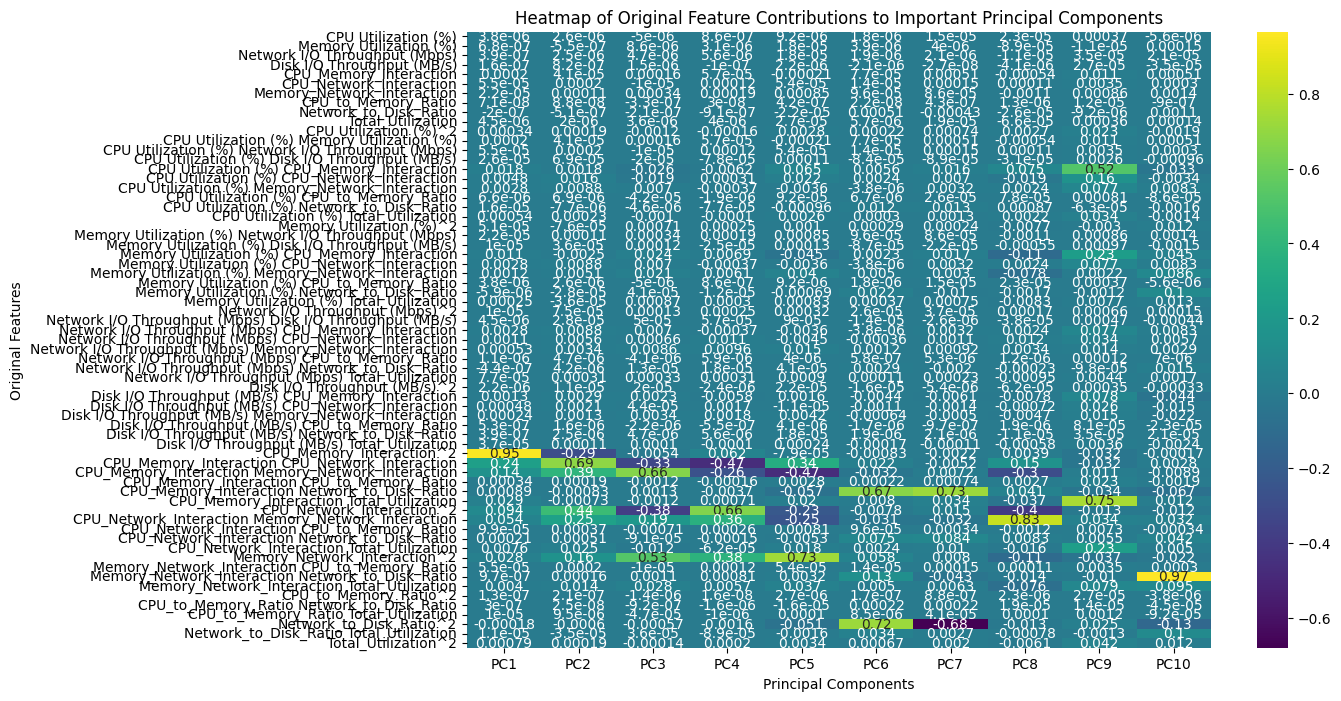

In [339]:
# Generate optimization recommendations based on model insights


# Extract the top features impacting Customer Satisfaction
top_features = feature_importances.head(10)

print("Top features impacting Customer Satisfaction:")
display(top_features)

# Extract the PCA component loadings
loadings = pd.DataFrame(
    pca.components_, columns=poly.get_feature_names_out(features.columns)
)

# Transpose the loadings DataFrame to access principal components by row
loadings_transposed = loadings.T
loadings_transposed.columns = [f"PC{i+1}" for i in range(loadings_transposed.shape[1])]

# Display the loadings for the most important components
important_pcs = top_features["Feature"].tolist()
loadings_important = loadings_transposed[important_pcs]

# Consolidate the top contributing features
top_contributors = []

for pc in important_pcs:
    sorted_loadings = loadings_transposed[pc].sort_values(ascending=False)
    top_features_list = sorted_loadings.head(10).index.tolist()
    top_contributors.extend(top_features_list)

# Remove duplicates and create a consolidated list of unique features
top_contributors = list(set(top_contributors))

# Display the consolidated list of top contributing features
print("Top Contributing Features (Consolidated):")
for feature in top_contributors:
    print(f"- {feature}")


# Create a heatmap to visualize the contributions of original features to important PCs
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_important, annot=True, cmap="viridis", yticklabels=True)
plt.title("Heatmap of Original Feature Contributions to Important Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

In [340]:
# Generate recommendations based on the consolidated list of top contributing features
recommendations = {}

if any("CPU Utilization (%)" in feature for feature in top_contributors):
    recommendations["Optimize CPU Utilization"] = (
        "CPU Utilization is a significant factor impacting performance. "
        "Optimize CPU allocation to ensure efficient usage and avoid bottlenecks. "
        "Consider implementing dynamic scaling based on real-time CPU usage patterns."
    )

if any("Memory Utilization (%)" in feature for feature in top_contributors):
    recommendations["Optimize Memory Utilization"] = (
        "Memory Utilization is critical for maintaining high performance. "
        "Ensure adequate memory allocation and monitor usage to prevent overloading. "
        "Upgrade memory resources as needed based on usage trends."
    )

if any("Network I/O Throughput (Mbps)" in feature for feature in top_contributors):
    recommendations["Enhance Network Throughput"] = (
        "Network I/O Throughput significantly impacts service uptime and performance. "
        "Monitor network performance and upgrade infrastructure to handle higher data volumes efficiently. "
        "Implement traffic management strategies to prioritize critical data flows."
    )

if any("Disk I/O Throughput (MB/s)" in feature for feature in top_contributors):
    recommendations["Improve Disk I/O Throughput"] = (
        "Disk I/O Throughput is vital for reducing response times and improving customer satisfaction. "
        "Invest in faster storage solutions like SSDs and regularly optimize storage systems."
    )

if any("CPU_Memory_Interaction" in feature for feature in top_contributors):
    recommendations["Optimize CPU-Memory Interaction"] = (
        "The interaction between CPU and memory utilization significantly impacts performance. "
        "Ensure balanced allocation of CPU and memory resources to avoid bottlenecks. "
        "Consider scaling CPU or memory resources based on usage patterns."
    )

if any("CPU_to_Memory_Ratio" in feature for feature in top_contributors):
    recommendations["Monitor and Adjust CPU-to-Memory Ratio"] = (
        "Maintain an optimal CPU-to-Memory ratio to prevent resource imbalances. "
        "Regularly analyze and adjust configurations to ensure efficient resource utilization."
    )

if any("Network_to_Disk_Ratio" in feature for feature in top_contributors):
    recommendations["Monitor and Adjust Network-to-Disk Ratio"] = (
        "Maintain an optimal Network-to-Disk ratio to ensure efficient data transfer and storage operations. "
        "Regularly analyze these ratios and adjust configurations as needed."
    )

# Display the data-driven recommendations
print("\nOptimization Recommendations Based on Model Insights:")
for recommendation, details in recommendations.items():
    print(f"\n{recommendation}:\n{details}")


Optimization Recommendations Based on Model Insights:

Optimize CPU Utilization:
CPU Utilization is a significant factor impacting performance. Optimize CPU allocation to ensure efficient usage and avoid bottlenecks. Consider implementing dynamic scaling based on real-time CPU usage patterns.

Optimize Memory Utilization:
Memory Utilization is critical for maintaining high performance. Ensure adequate memory allocation and monitor usage to prevent overloading. Upgrade memory resources as needed based on usage trends.

Enhance Network Throughput:
Network I/O Throughput significantly impacts service uptime and performance. Monitor network performance and upgrade infrastructure to handle higher data volumes efficiently. Implement traffic management strategies to prioritize critical data flows.

Improve Disk I/O Throughput:
Disk I/O Throughput is vital for reducing response times and improving customer satisfaction. Invest in faster storage solutions like SSDs and regularly optimize stora

### Key Findings

1. **Top Contributing Features:**
   - CPU Utilization (%)
   - Memory Utilization (%)
   - Network I/O Throughput (Mbps)
   - Disk I/O Throughput (MB/s)
   - CPU_Memory_Interaction
   - CPU_to_Memory_Ratio
   - Network_to_Disk_Ratio

2. **Model Performance:**
   - The RandomForest model showed the highest R² score, indicating strong predictive power for customer satisfaction.

3. **Actionable Recommendations:**
   - Optimize CPU and memory utilization, enhance network throughput, and improve disk I/O throughput.
   - Regularly monitor and adjust resource ratios and leverage predictive analytics for proactive resource management.


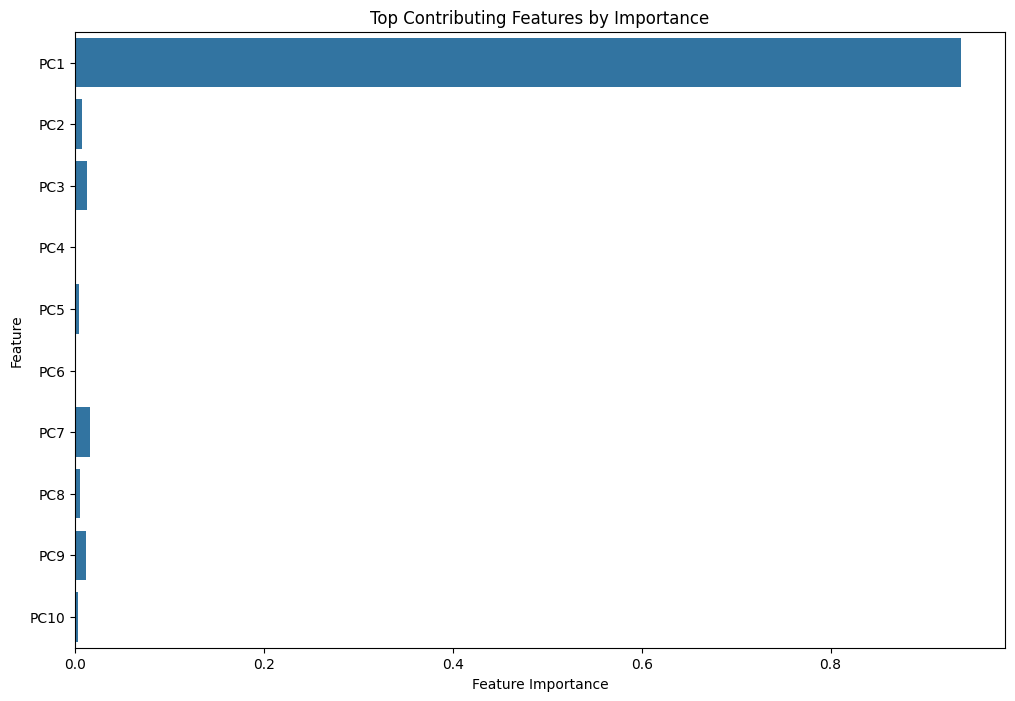

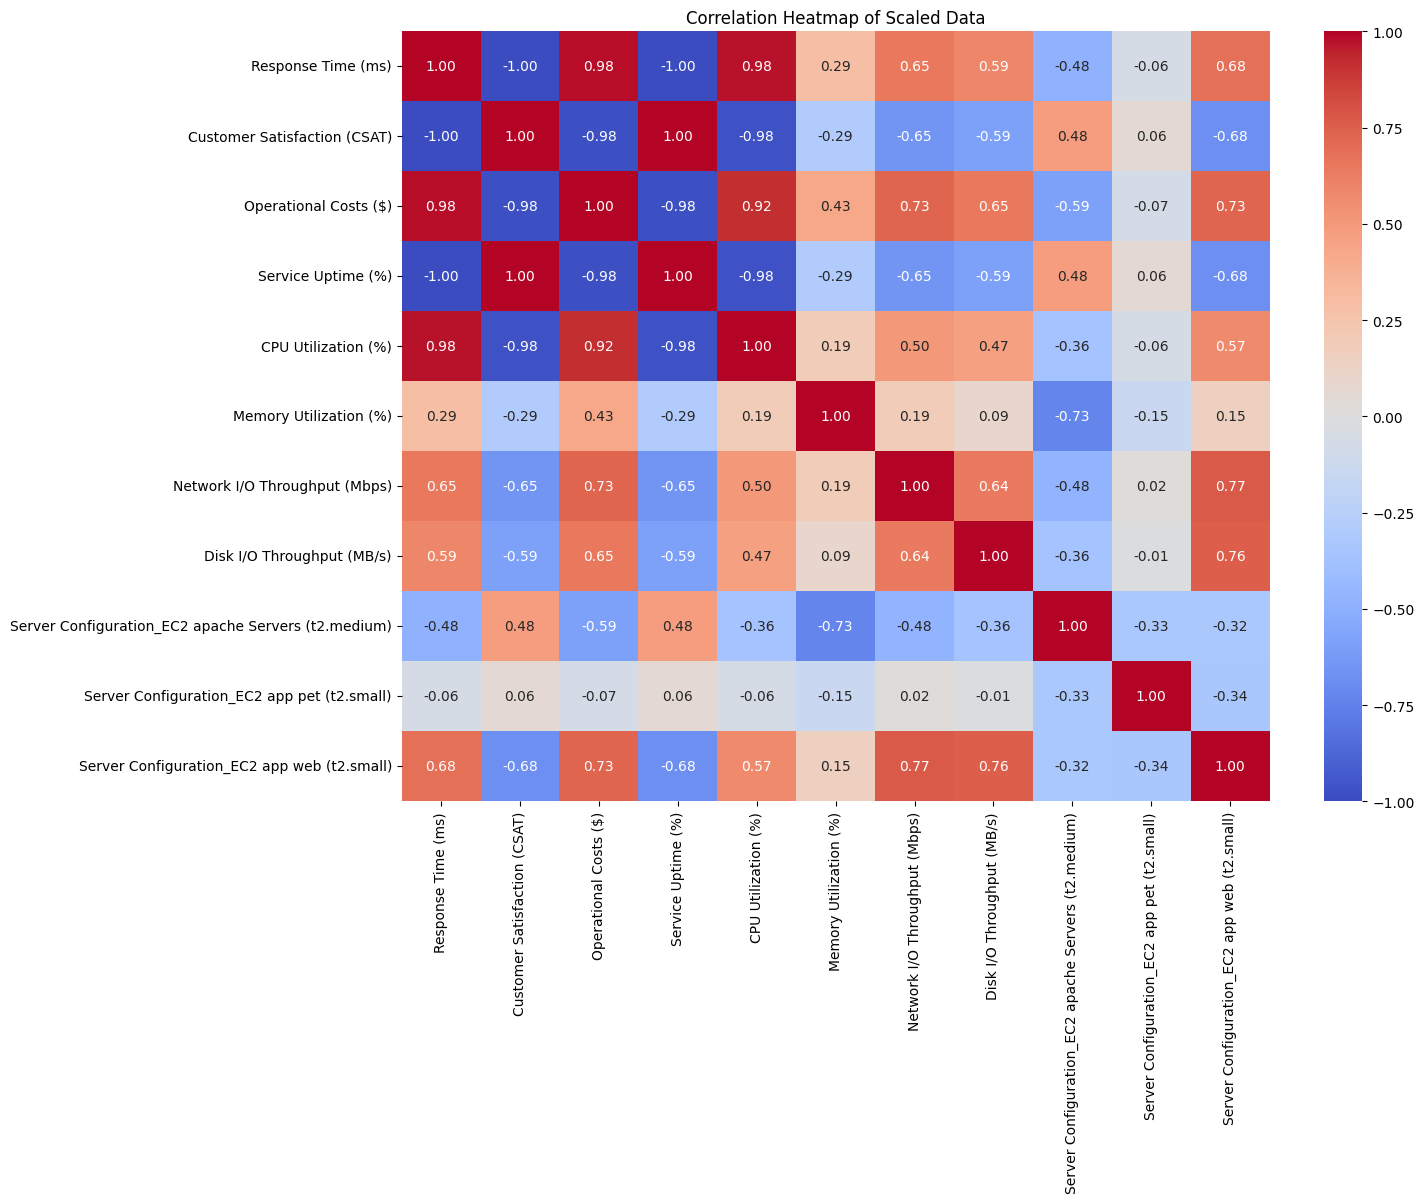

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top contributing features
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title("Top Contributing Features by Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Visualize the correlation heatmap of the scaled data
plt.figure(figsize=(14, 10))
sns.heatmap(combined_data_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Scaled Data")
plt.show()

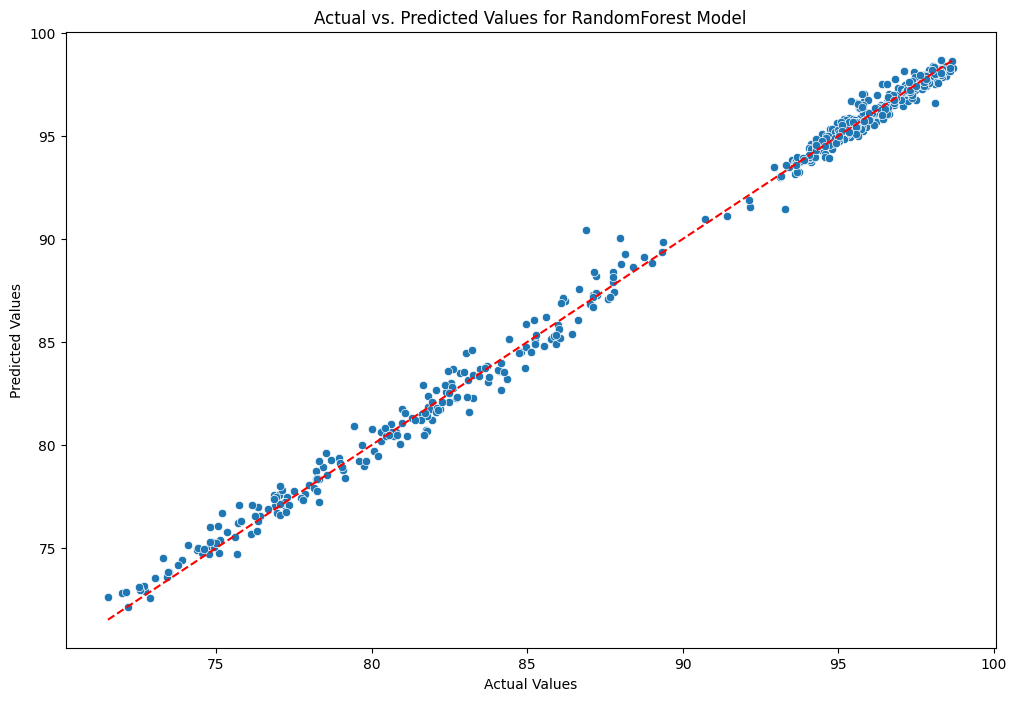

In [342]:
# Compare actual vs. predicted values for the best model (RandomForest)
y_pred_best = best_models["RandomForest"].predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_best})

# Plot actual vs. predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Actual", y="Predicted", data=comparison_df)
plt.plot(
    [comparison_df.min().min(), comparison_df.max().max()],
    [comparison_df.min().min(), comparison_df.max().max()],
    color="red",
    linestyle="--",
)
plt.title("Actual vs. Predicted Values for RandomForest Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [352]:
# Find the best configuration based on the model's predictions
best_index = y_pred_best.argmax()
best_configuration = X_test[best_index]

# Reshape the best configuration for inverse transform
best_configuration_reshaped = best_configuration.reshape(1, -1)

# Debug: Check the best configuration values
print("Best configuration (PCA components):", best_configuration)

# Inverse transform the PCA components to the polynomial feature space
best_configuration_poly_space = pca.inverse_transform(best_configuration_reshaped)

# Debug: Check the shape and values after PCA inverse transform
print("Shape after PCA inverse transform:", best_configuration_poly_space.shape)
print("Values after PCA inverse transform:", best_configuration_poly_space)

# Ensure the scaler's mean_ and scale_ attributes match the feature space
assert (
    scaler.mean_.shape[0] == best_configuration_poly_space.shape[1]
), "Shape mismatch between scaler and PCA-inversed data."

# Inverse transform the scaled polynomial features to the original features
best_configuration_original_space = scaler.inverse_transform(
    best_configuration_poly_space
)

# Debug: Check the shape and values after scaler inverse transform
print("Shape after scaler inverse transform:", best_configuration_original_space.shape)
print("Values after scaler inverse transform:", best_configuration_original_space)

# Create a DataFrame to display the best configuration with the original feature names
original_feature_names = poly.get_feature_names_out(features.columns)
best_config_df_original = pd.DataFrame(
    best_configuration_original_space, columns=original_feature_names
)

# Display the best configuration with its predicted metrics
best_predicted_value = y_pred_best[best_index]

print("Best Configuration (Original Feature Space):")
display(best_config_df_original)
print(f"Predicted Customer Satisfaction: {best_predicted_value:.2f}")

Best configuration (PCA components): [-4.37842171e+06 -3.31296599e+05 -1.46187864e+05 -4.82906250e+04
 -5.52713708e+04 -1.03205419e+04 -6.44023644e+01  1.69965253e+04
 -2.13113644e+04 -2.19570446e+03]
Shape after PCA inverse transform: (1, 65)
Values after PCA inverse transform: [[-633464.26328178 -220712.03368228 -542249.9978888  -459810.63752159
  -628470.23698201 -671699.31705795 -560918.73905497 -547718.79720292
   -92288.32843449 -623227.45727806 -607335.65851417 -628470.23698201
  -671699.31705795 -628598.41214528 -597911.00134584 -644576.97944467
  -679364.76787601 -557571.76550789 -160502.48765643 -624477.60102178
  -170861.57108131 -560918.73905497 -499266.73983668 -577798.12774567
  -679364.76787601 -527006.84171753 -633464.26328276  -96394.86235792
  -528833.0340338  -531492.50825528 -550803.38628879 -679364.76787601
  -615304.87823703 -543583.04762189 -625071.90910043 -106198.77001461
  -667235.8389346  -457598.24039131 -637566.32769144 -624999.57019749
  -561445.1714734  -

,CPU Utilization (%),Memory Utilization (%),Network I/O Throughput (Mbps),Disk I/O Throughput (MB/s),CPU_Memory_Interaction,CPU_Network_Interaction,Memory_Network_Interaction,CPU_to_Memory_Ratio,Network_to_Disk_Ratio,Total_Utilization,...,Memory_Network_Interaction^2,Memory_Network_Interaction CPU_to_Memory_Ratio,Memory_Network_Interaction Network_to_Disk_Ratio,Memory_Network_Interaction Total_Utilization,CPU_to_Memory_Ratio^2,CPU_to_Memory_Ratio Network_to_Disk_Ratio,CPU_to_Memory_Ratio Total_Utilization,Network_to_Disk_Ratio^2,Network_to_Disk_Ratio Total_Utilization,Total_Utilization^2
0,-2.114621e+07,-3.489601e+06,-4.335786e+06,-1.761353e+06,-1.009113e+09,-4.108066e+08,-2.131210e+08,-452019.803632,-5.814262e+06,-2.463581e+07,...,-2.645183e+11,-4.108066e+08,-2.065991e+09,-2.959055e+10,-887780.425814,-4.677710e+06,-5.978267e+07,-9.011859e+09,-5.193454e+08,-3.985464e+09


Predicted Customer Satisfaction: 98.67


### Simulate Costs and Configuration

To further optimize server configurations, we will simulate different configurations and evaluate their impact on key business metrics, particularly focusing on costs and customer satisfaction. The simulation will help in identifying cost-effective configurations that maximize performance.


In [356]:
import numpy as np
import pandas as pd


# Function to simulate costs and configurations
def simulate_configurations(model, pca, scaler, original_data, cost_factors):
    # Extract the original feature names after polynomial transformation
    original_feature_names = poly.get_feature_names_out(features.columns)

    # Initialize a list to store the cost metrics
    cost_metrics = []

    for i in range(10):  # Simulate 10 configurations for illustration
        # Create a new DataFrame with the same structure as the original data
        simulated_data = original_data.copy()

        # Apply random changes to the original data
        simulated_data["CPU Utilization (%)"] += np.random.uniform(
            -0.05, 0.05, size=simulated_data.shape[0]
        )
        simulated_data["Memory Utilization (%)"] += np.random.uniform(
            -0.05, 0.05, size=simulated_data.shape[0]
        )
        simulated_data["Network I/O Throughput (Mbps)"] += np.random.uniform(
            -5, 5, size=simulated_data.shape[0]
        )
        simulated_data["Disk I/O Throughput (MB/s)"] += np.random.uniform(
            -5, 5, size=simulated_data.shape[0]
        )

        # Apply polynomial features
        simulated_data_poly = poly.transform(simulated_data[features.columns])

        # Scale and apply PCA
        simulated_scaled = scaler.transform(simulated_data_poly)
        simulated_pca = pca.transform(simulated_scaled)

        # Predict using the model
        predicted_csats = model.predict(simulated_pca)

        # Calculate costs
        costs = (
            simulated_data["CPU Utilization (%)"].mean() * cost_factors["CPU"]
            + simulated_data["Memory Utilization (%)"].mean() * cost_factors["Memory"]
            + simulated_data["Network I/O Throughput (Mbps)"].mean()
            * cost_factors["Network"]
            + simulated_data["Disk I/O Throughput (MB/s)"].mean() * cost_factors["Disk"]
        )

        # Store the configuration, predicted CSAT, and costs
        cost_metrics.append(
            {
                "Configuration": simulated_data.iloc[0].to_dict(),
                "Predicted CSAT": predicted_csats[0],
                "Cost": costs,
            }
        )

    return cost_metrics


# Example cost factors (adjust these based on real costs)
cost_factors = {"CPU": 1.0, "Memory": 0.5, "Network": 0.2, "Disk": 0.1}

# Prepare combined data to ensure it matches the required feature set
features = combined_data[
    [
        "CPU Utilization (%)",
        "Memory Utilization (%)",
        "Network I/O Throughput (Mbps)",
        "Disk I/O Throughput (MB/s)",
    ]
]

# Add polynomial and interaction terms
features_poly = poly.fit_transform(features)

# Scale the data
scaler = StandardScaler().fit(features_poly)
features_scaled = scaler.transform(features_poly)

# Apply PCA
pca = PCA(n_components=10).fit(features_scaled)
features_pca = pca.transform(features_scaled)

# Simulate configurations and costs
simulated_results = simulate_configurations(
    best_models["RandomForest"], pca, scaler, features, cost_factors
)

# Display the simulated results
print("Simulated Configurations and Costs:")
for result in simulated_results:
    print(f"\nConfiguration: {result['Configuration']}")
    print(f"Predicted CSAT: {result['Predicted CSAT']:.2f}")
    print(f"Cost: ${result['Cost']:.2f}")

Simulated Configurations and Costs:

Configuration: {'CPU Utilization (%)': 0.0879875230492629, 'Memory Utilization (%)': 25.43451841322022, 'Network I/O Throughput (Mbps)': 1.6278545373082642, 'Disk I/O Throughput (MB/s)': -1.4033334957741452}
Predicted CSAT: 83.75
Cost: $50.32

Configuration: {'CPU Utilization (%)': 0.08528484197490323, 'Memory Utilization (%)': 25.394748568004683, 'Network I/O Throughput (Mbps)': 3.5103024683996256, 'Disk I/O Throughput (MB/s)': 4.318737524714963}
Predicted CSAT: 83.75
Cost: $50.33

Configuration: {'CPU Utilization (%)': 0.0449664709918577, 'Memory Utilization (%)': 25.38103081985233, 'Network I/O Throughput (Mbps)': -0.7119660780046977, 'Disk I/O Throughput (MB/s)': -3.5628430851774313}
Predicted CSAT: 83.75
Cost: $50.32

Configuration: {'CPU Utilization (%)': 0.09378242631613778, 'Memory Utilization (%)': 25.399230328821456, 'Network I/O Throughput (Mbps)': 0.7601364579860714, 'Disk I/O Throughput (MB/s)': 1.085253964496676}
Predicted CSAT: 83.75
